In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

train_df = pd.read_csv('C:/Users/82106/OneDrive/문서/GitHub/3rd_project/3rd_project/train.csv', parse_dates=['date'])
train_df.head(4)

C:\Users\82106\AppData\Local\Temp\ipykernel_30216\2264812970.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('C:/Users/82106/OneDrive/문서/GitHub/3rd_project/3rd_project/train.csv', parse_dates=['date'])


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213


In [2]:
#필요한 컬럼만 list형태를 통해 한번에 가져옴
get_list_col_name = ['date','fullVisitorId','visitStartTime']

# 원본데이터를 해치지않기위해 복사본 뜨기
train_df_2 = train_df[get_list_col_name].copy()

train_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            903653 non-null  datetime64[ns]
 1   fullVisitorId   903653 non-null  object        
 2   visitStartTime  903653 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 20.7+ MB


In [3]:
# visit_count 컬럼 추가
train_df_2['visit_count'] = 1

# date와 fullVisitorId 기준으로 그룹핑하고, visit_count의 합계를 구함
oneday_visit_count = train_df_2.groupby(['date','fullVisitorId'])['visit_count'].sum().reset_index()

# oneday_visit_count의 컬럼명 변경
oneday_visit_count.rename(columns={'visit_count': 'count'}, inplace=True)

In [ ]:
#count의 종류 15개 (1,2,3,4,5,6,7,8,9,10,11,12,14,32,18)
# 전체 컬럼 개수 835447개 /1의 개수 780517개/나머지 54930개 
#oneday_visit_count.nunique()


#dataFrame 구성 종류를 알수있는 코드 - 15개 (1,2,3,4,5,6,7,8,9,10,11,12,14,18,32)
#oneday_visit_count['count'].value_counts()


#전체 컬럼 개수확인코드 - 835447개
#oneday_visit_count['count'].count()


#count 값이 1이 아닌 행의개수 - 54930개
#oneday_visit_count[oneday_visit_count['count'] !=1].count()

In [4]:
# 고유한 key 값이 없는 상태라 merge기준 on에다가 두개의 컬럼사용함.
train_df_2 = pd.merge(train_df_2, oneday_visit_count, on=['date','fullVisitorId'], how='left')

# 불필요한 visit_count컬럼 날리기
train_df_2 = train_df_2.drop('visit_count', axis=1)

#count =1인 컬럼 날리기
train_df_2.drop(train_df_2[train_df_2['count'] == 1].index, inplace=True)

# train_df_2 전체 컬럼 개수 - 903653
# count== 1 컬럼 개수 - 780517개
# 남은 컬럼개수 - 123136개
train_df_2

,date,fullVisitorId,visitStartTime,count
47,2016-09-02,3523749053085989464,1472825389,2
53,2016-09-02,8720204952657722494,1472832336,2
63,2016-09-02,0854783508496317255,1472823316,2
67,2016-09-02,3746051970600816343,1472843059,2
69,2016-09-02,8720204952657722494,1472836503,2
...,...,...,...,...
903632,2017-01-04,7284032090862821897,1483533556,2
903634,2017-01-04,3591531861629139100,1483534920,2
903639,2017-01-04,168043908052904808,1483541485,2
903651,2017-01-04,2709355455991750775,1483592864,2


In [ ]:
train_df_2

In [ ]:
train_df_2.describe()

In [5]:
# 날짜별 id별 시간별로 재정렬
# ignore_index로 인덱스 재부여
train_df_2= train_df_2.sort_values(['date', 'fullVisitorId' ,'visitStartTime'], ignore_index=True)


In [6]:
# date와 fullVisitorId를 기준으로 그룹화
grouped = train_df_2.groupby(['date', 'fullVisitorId'])

# 각 그룹에 대해 visitStartTime의 차이를 계산하고, 이를 새로운 컬럼 'time_diff'에 저장
train_df_2['time_diff'] = grouped['visitStartTime'].diff()

# time_diff가 NaN인 경우 (각 그룹의 첫 번째 로우)를 0으로 채움
train_df_2['time_diff'].fillna(0, inplace=True)

# time_diff가 1800초 이하인 경우에만 cumsum을 계산하고, 이를 'cumulative_sum' 컬럼에 저장
train_df_2['cumulative_sum'] = train_df_2[train_df_2['time_diff'] < 1800].groupby(['date', 'fullVisitorId'])['time_diff'].cumsum()

# cumulative_sum가 NaN인 경우  0으로 채움
train_df_2['cumulative_sum'].fillna(0, inplace=True)


In [9]:
# cumsum 잘 됐는지 확인
train_df_2[train_df_2['count']==10]

,date,fullVisitorId,visitStartTime,count,time_diff,cumulative_sum
27516,2016-10-24,7022289419669541881,1477376125,10,0.0,0.0
27517,2016-10-24,7022289419669541881,1477376150,10,25.0,25.0
27518,2016-10-24,7022289419669541881,1477376170,10,20.0,45.0
27519,2016-10-24,7022289419669541881,1477376217,10,47.0,92.0
27520,2016-10-24,7022289419669541881,1477376326,10,109.0,201.0
27521,2016-10-24,7022289419669541881,1477377262,10,936.0,1137.0
27522,2016-10-24,7022289419669541881,1477377322,10,60.0,1197.0
27523,2016-10-24,7022289419669541881,1477377406,10,84.0,1281.0
27524,2016-10-24,7022289419669541881,1477378510,10,1104.0,2385.0
27525,2016-10-24,7022289419669541881,1477378580,10,70.0,2455.0


In [26]:
train_df_3 = train_df_2.copy()
train_df_3

,date,fullVisitorId,visitStartTime,count,time_diff,cumulative_sum
0,2016-08-01,79785550312480399,1470079426,2,0.0,0.0
1,2016-08-01,79785550312480399,1470103322,2,23896.0,0.0
2,2016-08-01,80533986466271934,1470066153,2,0.0,0.0
3,2016-08-01,80533986466271934,1470079574,2,13421.0,0.0
4,2016-08-01,143953260196124648,1470035292,2,0.0,0.0
...,...,...,...,...,...,...
123131,2017-08-01,9800325346437826374,1501646301,2,4742.0,0.0
123132,2017-08-01,98364958396860458,1501613953,2,0.0,0.0
123133,2017-08-01,98364958396860458,1501617156,2,3203.0,0.0
123134,2017-08-01,9846359776693659031,1501609974,2,0.0,0.0


In [27]:
train_df_3.drop(train_df_3[train_df_3['cumulative_sum']==0].index, inplace=True)
train_df_3.head(10)

,date,fullVisitorId,visitStartTime,count,time_diff,cumulative_sum
14,2016-08-01,382398254804709368,1470105023,3,772.0,772.0
17,2016-08-01,384088448748841648,1470092714,2,350.0,350.0
21,2016-08-01,512157711741253330,1470069654,3,1.0,1.0
22,2016-08-01,512157711741253330,1470069655,3,1.0,2.0
37,2016-08-01,796776238303447639,1470065461,2,172.0,172.0
58,2016-08-01,1231590494443171080,1470067091,2,100.0,100.0
62,2016-08-01,1314991181138104250,1470080370,3,24.0,24.0
80,2016-08-01,1727250443336990005,1470109884,2,73.0,73.0
110,2016-08-01,2652098492843037268,1470089428,2,268.0,268.0
134,2016-08-01,3907770685196037697,1470050008,4,1522.0,1522.0


In [40]:
# date와 fullVisitorId를 기준으로 그룹화하고, 각 그룹의 cumulative_sum의 최대값을 찾음
max_cumulative_sum = train_df_3.groupby(['date', 'fullVisitorId'])['cumulative_sum'].transform(max)

# cumulative_sum이 그룹의 최대값과 같은 로우만 남김
train_df_3 = train_df_3[train_df_3['cumulative_sum'] == max_cumulative_sum].reset_index(drop=True)
train_df_3


,date,fullVisitorId,visitStartTime,count,time_diff,cumulative_sum
0,2016-08-01,382398254804709368,1470105023,3,772.0,772.0
1,2016-08-01,384088448748841648,1470092714,2,350.0,350.0
2,2016-08-01,512157711741253330,1470069655,3,1.0,2.0
3,2016-08-01,796776238303447639,1470065461,2,172.0,172.0
4,2016-08-01,1231590494443171080,1470067091,2,100.0,100.0
...,...,...,...,...,...,...
10287,2017-08-01,8907786034323049031,1501618925,2,131.0,131.0
10288,2017-08-01,9004018791623835992,1501632018,2,170.0,170.0
10289,2017-08-01,9082216468378814100,1501643019,2,299.0,299.0
10290,2017-08-01,9472927015509997056,1501655171,2,1260.0,1260.0


In [55]:
train_df_3['fullVisitorId'].count()

10292

In [53]:
train_df_3[train_df_3['fullVisitorId']==840061748220645]

,date,fullVisitorId,visitStartTime,count,time_diff,cumulative_sum
8033,2017-05-20,840061748220645,1495325621,2,84.0,84.0


In [57]:
# 유저별로 평균 접속 시간 계산
train_df_3_ecdf = train_df_3.groupby('fullVisitorId').agg({'cumulative_sum' :'mean'})
train_df_3_ecdf

,cumulative_sum
fullVisitorId,
358027242270102,308.0
562678147042735,601.0
784866236467706,76.0
840061748220645,84.0
938900107290675,1117.0
...,...
9976301693610051115,8.0
997849543126329010,252.0
9983110588349249538,712.0


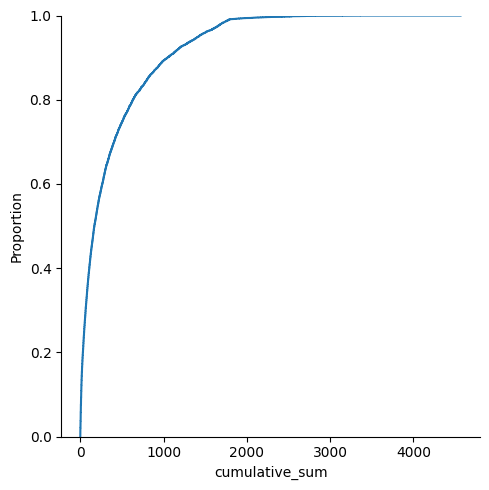

In [58]:
sns.displot(train_df_3_ecdf, x="cumulative_sum", kind="ecdf")